<a href="https://colab.research.google.com/github/k-Mahendran/CNN-Projects/blob/main/Fashion_Clothes_Prediction_Analysis_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import models, datasets, layers
from sklearn.model_selection import train_test_split

In [ ]:
# Getting Datasets from tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore the Data

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
len(x_test)

10000

In [ ]:
y_train.shape

(60000,)

In [ ]:
len(y_test)

10000

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Preprocessing the Data

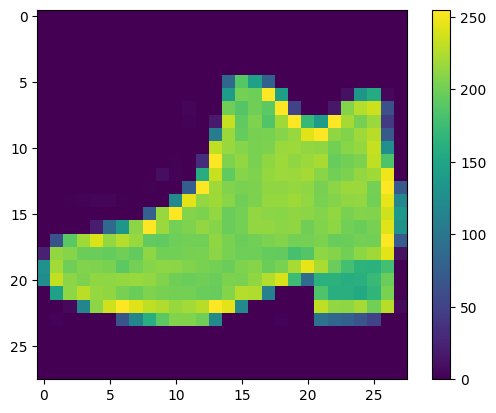

In [ ]:
plt.figure()
plt.imshow(x_train[15])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0

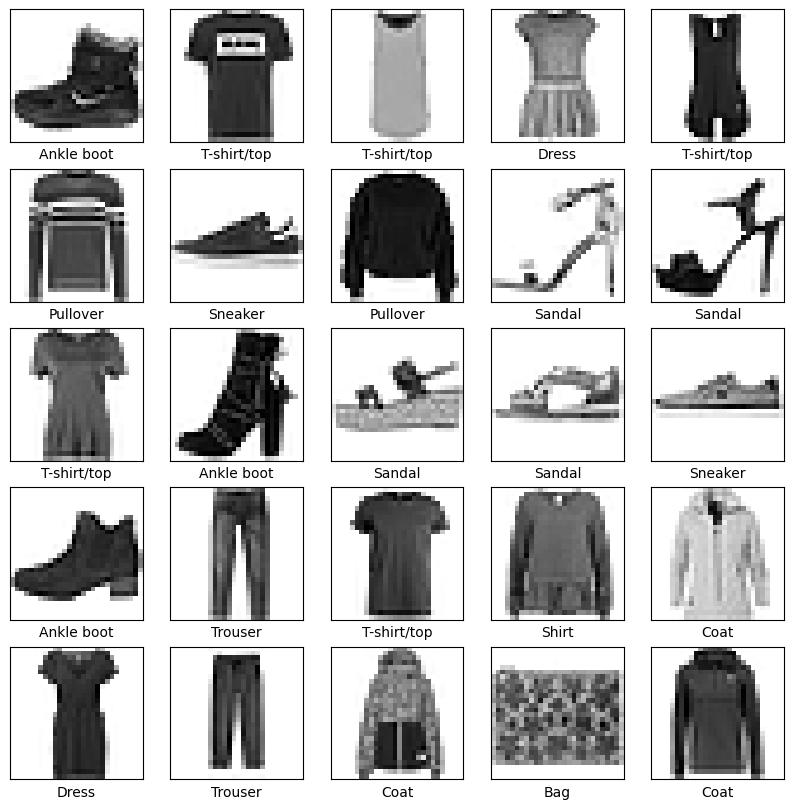

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

Build the Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,296 (91.00 KB)

 Trainable params: 23,296 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

Neural Networks Operations

In [ ]:
model.add(layers.Flatten(input_shape = (28, 28)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the Model

In [ ]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.7347 - loss: 0.7189
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8675 - loss: 0.3583
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8892 - loss: 0.2995
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9023 - loss: 0.2686
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9064 - loss: 0.2520
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9150 - loss: 0.2244
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9235 - loss: 0.2027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9287 - loss: 0.1878
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9337 - loss: 0.1748
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9403 - loss: 0.1576


In [ ]:
test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)

print('\nTest accuracy:', test_acc)

1875/1875 - 12s - 6ms/step - accuracy: 0.9447 - loss: 0.1468

Test accuracy: 0.9447333216667175


In [ ]:
# prediction

y_predict = model.predict(x_test)
y_predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[-1.03212376e+01, -1.54014254e+01, -1.25890999e+01, ...,
        -1.01723158e+00, -1.49359236e+01,  1.23573608e+01],
       [-2.06928968e+00, -1.36615095e+01,  9.92658234e+00, ...,
        -2.47606907e+01, -3.98668694e+00, -1.34654236e+01],
       [-3.48489857e+00,  2.23451004e+01, -4.68570900e+00, ...,
        -3.84816742e+01, -1.79044552e+01, -3.02248974e+01],
       ...,
       [ 9.64499593e-01, -1.56802721e+01, -7.15467358e+00, ...,
        -1.62341766e+01,  1.45430946e+01, -1.37610130e+01],
       [-2.73891020e+00,  1.94009018e+01, -8.97234917e+00, ...,
        -3.15708904e+01, -6.17672682e+00, -2.61787090e+01],
       [-4.44709539e+00, -1.09736843e+01, -7.47056913e+00, ...,
         5.59812665e-01,  1.38960928e-02, -2.02128410e+00]], dtype=float32)

In [ ]:
y_predict1 = np.argmax(y_predict, axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict1,y_test)

0.8989

In [ ]:
y_predict1[6]

np.int64(4)

In [ ]:
y_test[6]

np.uint8(4)

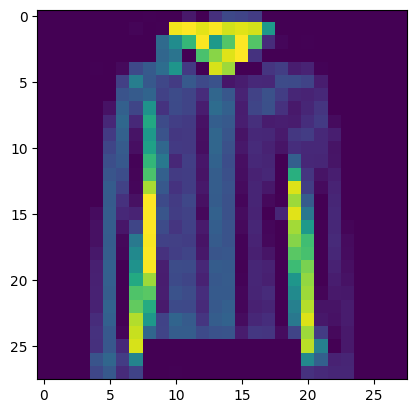

In [ ]:
plt.imshow(x_test[6])